In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import joblib
import plotly.express as px
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Loading data

In [2]:
df = pd.read_csv('dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


# Encoding the target variable to 0 and 1

In [3]:
df['status'] = df['status'].apply(lambda x: 0 if x == 'legitimate' else 1)
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


## Droping the unnecessery column

In [4]:
df.drop(columns = ['url'], inplace = True)

## Selecting the independant columns and target column.
### Select k best method is used to reduce dimension which uses ANOVA test at the backend

In [5]:
X = df.drop(columns = ['status'])
y = df['status']
# ANOVA F-test
anova_selector = SelectKBest(score_func=f_classif, k=5)
anova_selector.fit(X, y)

# Get selected feature names
selected_features_anova = X.columns[anova_selector.get_support()]
print("Selected features (ANOVA):", selected_features_anova.tolist())

Selected features (ANOVA): ['nb_www', 'ratio_digits_url', 'domain_in_title', 'google_index', 'page_rank']


c:\Users\eduah\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 8 59 61 63 68 71] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\eduah\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


## Support Vector Machines
### RBF kernel with auto gamma is used

In [ ]:

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
X_selected = X[selected_features_anova] 

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)

svm_model = SVC(kernel='rbf', C=1.0,gamma='auto') 
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)



Accuracy: 0.9160
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      1134
           1       0.91      0.92      0.92      1152

    accuracy                           0.92      2286
   macro avg       0.92      0.92      0.92      2286
weighted avg       0.92      0.92      0.92      2286



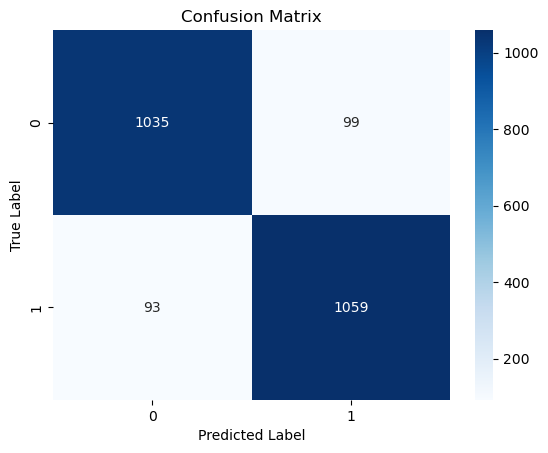

In [7]:
from sklearn.metrics import accuracy_score, classification_report
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [8]:
train_accuracy = svm_model.score(X_train, y_train)
test_accuracy = svm_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9132
Test Accuracy: 0.9160


## Naive Bayes Classifier
### Gaussian version

Accuracy: 0.8836
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      1134
           1       0.89      0.88      0.88      1152

    accuracy                           0.88      2286
   macro avg       0.88      0.88      0.88      2286
weighted avg       0.88      0.88      0.88      2286



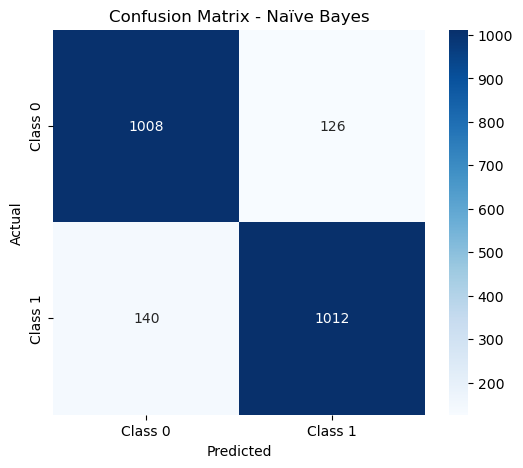

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naïve Bayes')
plt.show()

## Random Forest

Accuracy: 0.9217
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1134
           1       0.92      0.93      0.92      1152

    accuracy                           0.92      2286
   macro avg       0.92      0.92      0.92      2286
weighted avg       0.92      0.92      0.92      2286



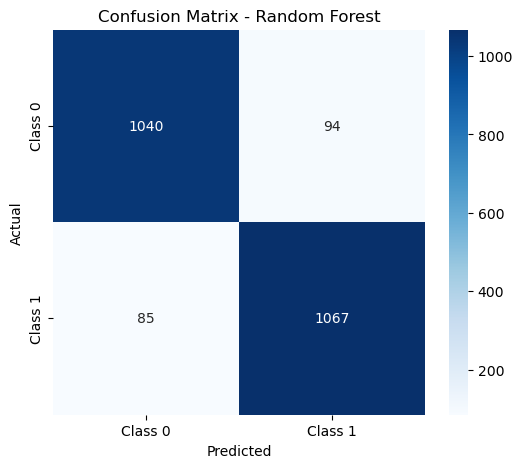

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(random_state=42,criterion='entropy')
RF_model.fit(X_train, y_train)

y_pred = RF_model.predict(X_test)
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

## Gradient Boosting Classifier

Accuracy: 0.9213
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1134
           1       0.92      0.92      0.92      1152

    accuracy                           0.92      2286
   macro avg       0.92      0.92      0.92      2286
weighted avg       0.92      0.92      0.92      2286



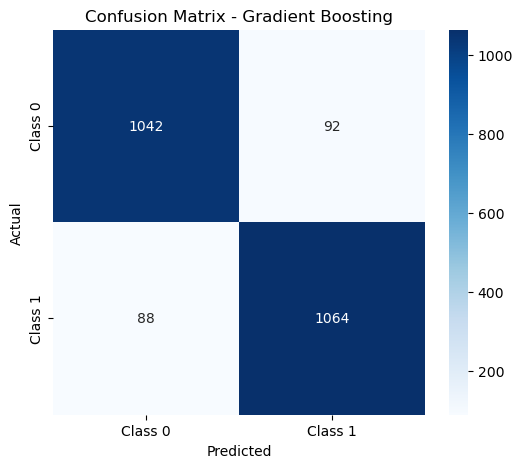

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,random_state=42,)
gb_model.fit(X_train,y_train)

y_pred = gb_model.predict(X_test)
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

## Choosing Gradient Boosting model for implementation

In [12]:
import joblib
joblib.dump(gb_model, "phishing.pkl")
print("Model saved successfully!")


Model saved successfully!
